# Instalación e Importaciones de Paquetes necesarios

In [ ]:
import subprocess
import sys

def install_package(package):
    """Instala un paquete usando pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} instalado exitosamente")
    except subprocess.CalledProcessError as e:
        print(f"Error instalando {package}: {e}")

# Lista de paquetes requeridos
packages = [
    "transformers>=4.21.0",      # Librería para trabajar con modelos transformer
    "torch>=1.12.0",             # PyTorch - framework de deep learning
    "datasets>=2.0.0",           # Manejo de datasets para ML
    "scikit-learn>=1.1.0",       # Herramientas de machine learning
    "matplotlib>=3.5.0",         # Visualización de datos
    "seaborn>=0.11.0",           # Visualización estadística
    "pandas>=1.4.0",             # Análisis de datos tabulares
    "numpy>=1.21.0",             # Operaciones numéricas
    "tqdm>=4.64.0",              # Barras de progreso
    "tree-sitter>=0.20.0",       # Parseo de código para AST
    "networkx>=2.8.0",           # Manejo de grafos (para GraphCodeBERT)
    "plotly>=5.0.0"              # Visualizaciones interactivas
]

print("Iniciando instalación de dependencias...")
for package in packages:
    install_package(package)

print("\nInstalación completada!")

Iniciando instalación de dependencias...
transformers>=4.21.0 instalado exitosamente
torch>=1.12.0 instalado exitosamente
datasets>=2.0.0 instalado exitosamente
scikit-learn>=1.1.0 instalado exitosamente
matplotlib>=3.5.0 instalado exitosamente
seaborn>=0.11.0 instalado exitosamente
pandas>=1.4.0 instalado exitosamente
numpy>=1.21.0 instalado exitosamente
tqdm>=4.64.0 instalado exitosamente
tree-sitter>=0.20.0 instalado exitosamente
networkx>=2.8.0 instalado exitosamente
plotly>=5.0.0 instalado exitosamente

Instalación completada!


In [ ]:
# Importaciones y configuración básica del entorno

# Importaciones principales
import os
import re
import ast
import json
import warnings
from typing import List, Dict, Tuple, Optional
from dataclasses import dataclass
from pathlib import Path

# Deep Learning y ML
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    RobertaTokenizer, RobertaModel, RobertaConfig,
    Trainer, TrainingArguments
)

# Análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilidades
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import networkx as nx

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuración de dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

# Configuración de semilla para reproducibilidad
torch.manual_seed(42)
np.random.seed(42)

print("Configuración inicial completada!")

Dispositivo utilizado: cuda
GPU: Tesla T4
Memoria GPU: 14.74 GB
Configuración inicial completada!


# Comparativa de Modelos

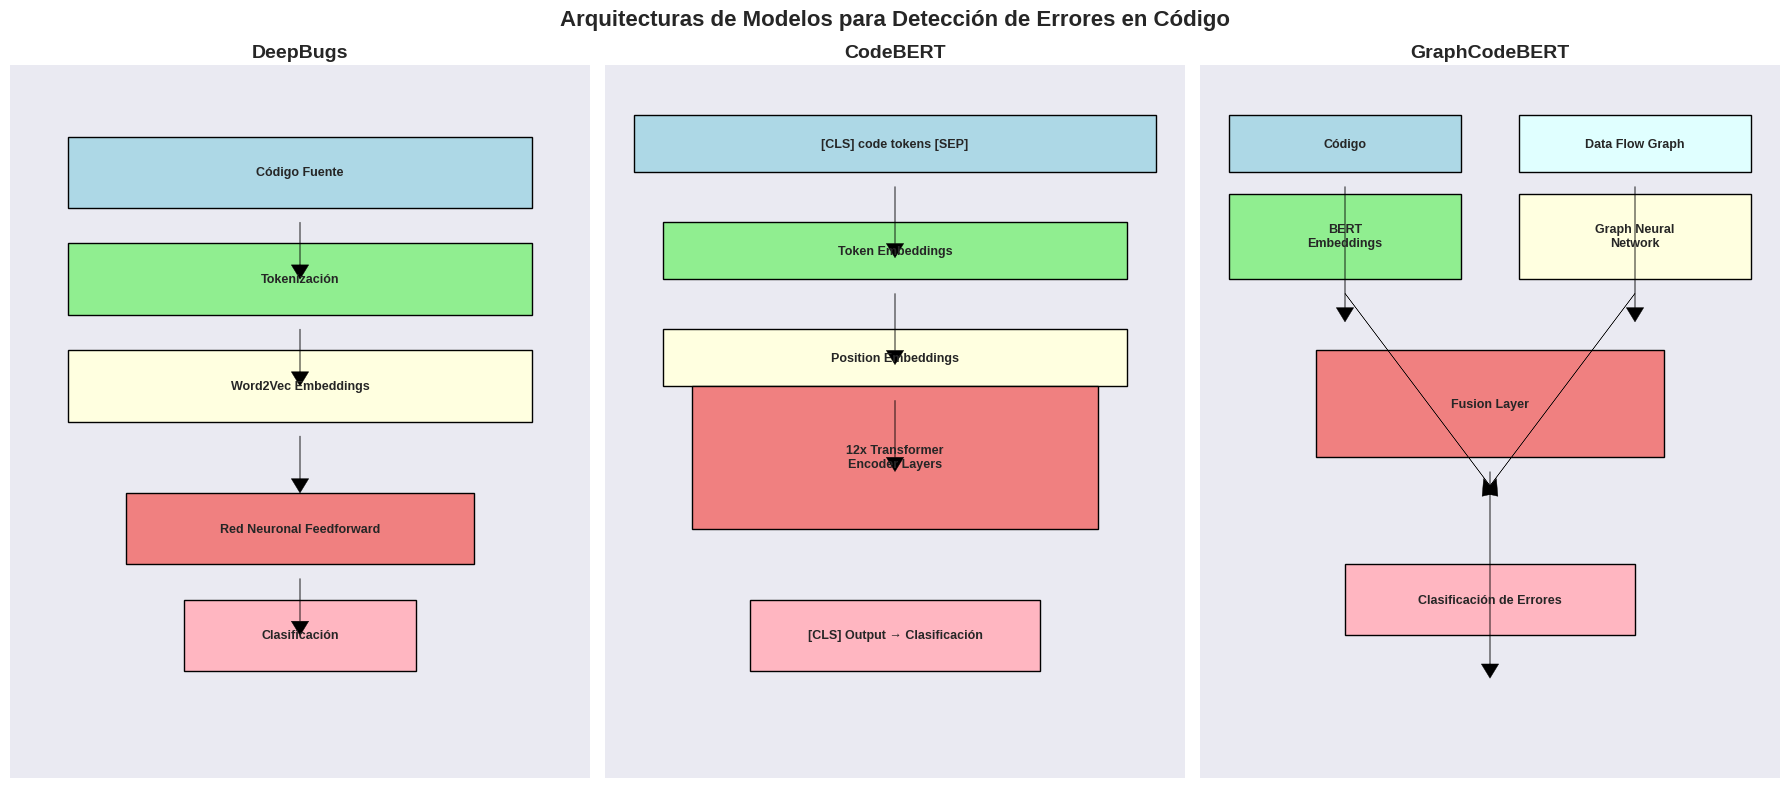


📊 Comparación de Modelos:


,Modelo,Arquitectura Base,Pre-entrenamiento,Comprensión Estructural,Parámetros,Año
0,DeepBugs,Feedforward NN,No,Básica,~1M,2018
1,CodeBERT,BERT Transformer,Sí (2.1M funciones),Buena,125M,2020
2,GraphCodeBERT,BERT + GNN,Sí + Data Flow,Excelente,125M+,2021


In [ ]:
# Visualización de las arquitecturas de los modelos
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

# Crear figura y subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Arquitecturas de Modelos para Detección de Errores en Código', fontsize=16, fontweight='bold')

# DeepBugs Architecture
ax1 = axes[0]
ax1.set_title('DeepBugs', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Dibujo DeepBugs architecture
boxes_deepbugs = [
    {'xy': (1, 8), 'width': 8, 'height': 1, 'label': 'Código Fuente', 'color': 'lightblue'},
    {'xy': (1, 6.5), 'width': 8, 'height': 1, 'label': 'Tokenización', 'color': 'lightgreen'},
    {'xy': (1, 5), 'width': 8, 'height': 1, 'label': 'Word2Vec Embeddings', 'color': 'lightyellow'},
    {'xy': (2, 3), 'width': 6, 'height': 1, 'label': 'Red Neuronal Feedforward', 'color': 'lightcoral'},
    {'xy': (3, 1.5), 'width': 4, 'height': 1, 'label': 'Clasificación', 'color': 'lightpink'}
]

for box in boxes_deepbugs:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax1.add_patch(rect)
    ax1.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_deepbugs = [(5, 8), (5, 6.5), (5, 5), (5, 3), (5, 1.5)]
for i in range(len(arrows_deepbugs)-1):
    ax1.arrow(arrows_deepbugs[i][0], arrows_deepbugs[i][1]-0.2, 0, -0.6,
             head_width=0.3, head_length=0.2, fc='black', ec='black')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# CodeBERT Architecture
ax2 = axes[1]
ax2.set_title('CodeBERT', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)

boxes_codebert = [
    {'xy': (0.5, 8.5), 'width': 9, 'height': 0.8, 'label': '[CLS] code tokens [SEP]', 'color': 'lightblue'},
    {'xy': (1, 7), 'width': 8, 'height': 0.8, 'label': 'Token Embeddings', 'color': 'lightgreen'},
    {'xy': (1, 5.5), 'width': 8, 'height': 0.8, 'label': 'Position Embeddings', 'color': 'lightyellow'},
    {'xy': (1.5, 3.5), 'width': 7, 'height': 2, 'label': '12x Transformer\nEncoder Layers', 'color': 'lightcoral'},
    {'xy': (2.5, 1.5), 'width': 5, 'height': 1, 'label': '[CLS] Output → Clasificación', 'color': 'lightpink'}
]

for box in boxes_codebert:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax2.add_patch(rect)
    ax2.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_codebert = [(5, 8.5), (5, 7), (5, 5.5), (5, 3.5)]
for i in range(len(arrows_codebert)-1):
    ax2.arrow(arrows_codebert[i][0], arrows_codebert[i][1]-0.2, 0, -0.8,
             head_width=0.3, head_length=0.2, fc='black', ec='black')

ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# GraphCodeBERT Architecture
ax3 = axes[2]
ax3.set_title('GraphCodeBERT', fontsize=14, fontweight='bold')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)

boxes_graphbert = [
    {'xy': (0.5, 8.5), 'width': 4, 'height': 0.8, 'label': 'Código', 'color': 'lightblue'},
    {'xy': (5.5, 8.5), 'width': 4, 'height': 0.8, 'label': 'Data Flow Graph', 'color': 'lightcyan'},
    {'xy': (0.5, 7), 'width': 4, 'height': 1.2, 'label': 'BERT\nEmbeddings', 'color': 'lightgreen'},
    {'xy': (5.5, 7), 'width': 4, 'height': 1.2, 'label': 'Graph Neural\nNetwork', 'color': 'lightyellow'},
    {'xy': (2, 4.5), 'width': 6, 'height': 1.5, 'label': 'Fusion Layer', 'color': 'lightcoral'},
    {'xy': (2.5, 2), 'width': 5, 'height': 1, 'label': 'Clasificación de Errores', 'color': 'lightpink'}
]

for box in boxes_graphbert:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax3.add_patch(rect)
    ax3.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_graphbert_1 = [(2.5, 8.5), (2.5, 7)]
arrows_graphbert_2 = [(7.5, 8.5), (7.5, 7)]
arrows_graphbert_3 = [(2.5, 7), (5, 4.5)]
arrows_graphbert_4 = [(7.5, 7), (5, 4.5)]
arrows_graphbert_5 = [(5, 4.5), (5, 2)]

for arrows in [arrows_graphbert_1, arrows_graphbert_2, arrows_graphbert_3,
               arrows_graphbert_4, arrows_graphbert_5]:
    for i in range(len(arrows)-1):
        dx = arrows[i+1][0] - arrows[i][0]
        dy = arrows[i+1][1] - arrows[i][1]
        ax3.arrow(arrows[i][0], arrows[i][1]-0.2, dx, dy-0.2,
                 head_width=0.3, head_length=0.2, fc='black', ec='black')

ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Comparación de características de los modelos
comparison_data = {
    'Modelo': ['DeepBugs', 'CodeBERT', 'GraphCodeBERT'],
    'Arquitectura Base': ['Feedforward NN', 'BERT Transformer', 'BERT + GNN'],
    'Pre-entrenamiento': ['No', 'Sí (2.1M funciones)', 'Sí + Data Flow'],
    'Comprensión Estructural': ['Básica', 'Buena', 'Excelente'],
    'Parámetros': ['~1M', '125M', '125M+'],
    'Año': ['2018', '2020', '2021']
}

df_comparison = pd.DataFrame(comparison_data)
print("\n📊 Comparación de Modelos:")
print("="*50)
display(df_comparison)

#Implementación Práctica en Python de los 3 modelos: DeepBugs, CodeBERT y GraphCodeBERT

In [ ]:
from dataclasses import dataclass
from typing import Dict, List
import torch
from transformers import AutoModel, AutoTokenizer

# 4.2 Clase base para detección de errores
@dataclass
class CodeError:
    """Clase para representar un error detectado en código"""
    line_number: int
    column: int
    error_type: str
    description: str
    suggestion: str
    confidence: float
    context: str

class CodeErrorDetector:
    """Clase base para detectores de errores en código"""

    def __init__(self, model_name: str = "microsoft/codebert-base"):
        self.model_name = model_name
        self.tokenizer = None
        self.model = None
        self.device = device
        self.setup_model()

    def setup_model(self):
        """Configura el modelo y tokenizer"""
        print(f"🔧 Configurando modelo: {self.model_name}")
        try:
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
            self.model = AutoModel.from_pretrained(self.model_name)
            self.model.to(self.device)
            self.model.eval()
            print("Modelo configurado exitosamente")
        except Exception as e:
            print(f"Error configurando modelo: {e}")

    def preprocess_code(self, code: str) -> Dict:
        """Preprocesa el código para el modelo"""
        try:
            # Tokenizar el código
            tokens = self.tokenizer(
                code,
                return_tensors="pt",
                max_length=512,
                truncation=True,
                padding=True
            )
            return {k: v.to(self.device) for k, v in tokens.items()}
        except Exception as e:
            print(f"Error en preprocessing: {e}")
            return {}

    def extract_features(self, code: str) -> torch.Tensor:
        """Extrae características del código usando el modelo"""
        try:
            inputs = self.preprocess_code(code)
            if not inputs:
                return torch.zeros(768).to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                # Usar el embedding del token [CLS]
                features = outputs.last_hidden_state[:, 0, :]
                return features.squeeze()
        except Exception as e:
            print(f"Error extrayendo features: {e}")
            return torch.zeros(768).to(self.device)

    def detect_errors(self, code: str) -> List[CodeError]:
        """Método base para detectar errores (a ser sobrescrito)"""
        raise NotImplementedError("Debe implementarse en clases derivadas")

    def analyze_code_file(self, file_path: str) -> List[CodeError]:
        """Analiza un archivo de código completo"""
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                code = f.read()
            return self.detect_errors(code)
        except Exception as e:
            print(f"Error analizando archivo {file_path}: {e}")
            return []

print("Clase base CodeErrorDetector creada")

Clase base CodeErrorDetector creada


In [ ]:
class DeepBugsDetector(CodeErrorDetector):
    """Detector de errores inspirado en DeepBugs"""

    def __init__(self):
        super().__init__("microsoft/codebert-base")
        self.common_errors = self._load_error_patterns()
        self.classifier = self._build_classifier()

    def _load_error_patterns(self) -> Dict:
        """Carga patrones comunes de errores"""
        return {
            'assignment_vs_comparison': {
                'pattern': r'if\s*\([^)]*=\s*[^=]',
                'description': 'Posible uso de asignación (=) en lugar de comparación (==)',
                'suggestion': 'Considere usar == para comparación'
            },
            'off_by_one': {
                'pattern': r'for\s+\w+\s+in\s+range\s*\(\s*len\s*\([^)]+\)\s*\)',
                'description': 'Posible error off-by-one en bucle',
                'suggestion': 'Verifique si necesita range(len(array)) vs range(len(array)-1)'
            },
            'logical_operators': {
                'pattern': r'(and|or)\s+(True|False)\s*$',
                'description': 'Operador lógico con literal booleano',
                'suggestion': 'Considere simplificar la expresión lógica'
            },
            'variable_typo': {
                'pattern': r'\b\w*[a-z][A-Z]\w*[a-z][A-Z]\w*\b',
                'description': 'Posible error tipográfico en nombre de variable',
                'suggestion': 'Verifique la ortografía del nombre de variable'
            }
        }

    def _build_classifier(self) -> nn.Module:
        """Construye el clasificador de errores"""
        class ErrorClassifier(nn.Module):
            def __init__(self, input_dim=768, hidden_dim=256, num_classes=5):
                super().__init__()
                self.fc1 = nn.Linear(input_dim, hidden_dim)
                self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
                self.fc3 = nn.Linear(hidden_dim // 2, num_classes)
                self.dropout = nn.Dropout(0.2)
                self.relu = nn.ReLU()

            def forward(self, x):
                x = self.relu(self.fc1(x))
                x = self.dropout(x)
                x = self.relu(self.fc2(x))
                x = self.dropout(x)
                x = self.fc3(x)
                return F.softmax(x, dim=-1)

        classifier = ErrorClassifier().to(self.device)
        return classifier

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando patrones y clasificación"""
        errors = []
        lines = code.split('\n')

        # Detección basada en patrones
        for i, line in enumerate(lines):
            for error_type, pattern_info in self.common_errors.items():
                if re.search(pattern_info['pattern'], line):
                    error = CodeError(
                        line_number=i + 1,
                        column=0,
                        error_type=error_type,
                        description=pattern_info['description'],
                        suggestion=pattern_info['suggestion'],
                        confidence=0.7,
                        context=line.strip()
                    )
                    errors.append(error)

        # Detección basada en embeddings (simulada)
        features = self.extract_features(code)
        if features is not None and features.numel() > 0:
            # Reshape para el clasificador
            features_input = features.unsqueeze(0)
            with torch.no_grad():
                predictions = self.classifier(features_input)
                max_prob, predicted_class = torch.max(predictions, 1)

                if max_prob.item() > 0.8 and predicted_class.item() > 0:
                    error = CodeError(
                        line_number=1,
                        column=0,
                        error_type="ml_detected",
                        description=f"Error detectado por ML (clase {predicted_class.item()})",
                        suggestion="Revisar lógica del código",
                        confidence=max_prob.item(),
                        context=code[:100] + "..." if len(code) > 100 else code
                    )
                    errors.append(error)

        return errors

print("DeepBugsDetector implementado")

DeepBugsDetector implementado


In [ ]:
class CodeBERTDetector(CodeErrorDetector):
    """Detector de errores usando CodeBERT"""

    def __init__(self):
        super().__init__("microsoft/codebert-base")
        self.error_classifier = self._build_error_classifier()
        self.semantic_analyzer = self._build_semantic_analyzer()

    def _build_error_classifier(self) -> nn.Module:
        """Construye clasificador específico para errores"""
        class CodeBERTErrorClassifier(nn.Module):
            def __init__(self, bert_dim=768, num_error_types=6):
                super().__init__()
                self.bert_projection = nn.Linear(bert_dim, 512)
                self.error_layers = nn.Sequential(
                    nn.Linear(512, 256),
                    nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(128, num_error_types)
                )

            def forward(self, bert_features):
                x = self.bert_projection(bert_features)
                error_scores = self.error_layers(x)
                return torch.sigmoid(error_scores)  # Multi-label classification

        return CodeBERTErrorClassifier().to(self.device)

    def _build_semantic_analyzer(self) -> nn.Module:
        """Construye analizador semántico para contexto"""
        class SemanticAnalyzer(nn.Module):
            def __init__(self, input_dim=768):
                super().__init__()
                self.attention = nn.MultiheadAttention(input_dim, num_heads=8)
                self.norm = nn.LayerNorm(input_dim)
                self.semantic_score = nn.Linear(input_dim, 1)

            def forward(self, features):
                # Self-attention para capturar relaciones semánticas
                attn_out, _ = self.attention(features, features, features)
                features = self.norm(features + attn_out)
                score = torch.sigmoid(self.semantic_score(features))
                return score

        return SemanticAnalyzer().to(self.device)

    def _analyze_syntax_patterns(self, code: str) -> List[Dict]:
        """Analiza patrones sintácticos específicos"""
        patterns = []
        lines = code.split('\n')

        for i, line in enumerate(lines):
            # Detectar asignaciones en condiciones
            if re.search(r'if\s*\([^)]*[^!=<>]\s*=\s*[^=]', line):
                patterns.append({
                    'line': i + 1,
                    'type': 'assignment_in_condition',
                    'severity': 'high',
                    'description': 'Asignación en condición if'
                })

            # Detectar comparaciones con = simple
            if re.search(r'while\s*\([^)]*[^!=<>]\s*=\s*[^=]', line):
                patterns.append({
                    'line': i + 1,
                    'type': 'assignment_in_while',
                    'severity': 'high',
                    'description': 'Asignación en condición while'
                })

            # Detectar variables no utilizadas
            var_match = re.search(r'(\w+)\s*=\s*.*', line)
            if var_match and i < len(lines) - 1:
                var_name = var_match.group(1)
                rest_code = '\n'.join(lines[i+1:])
                if var_name not in rest_code:
                    patterns.append({
                        'line': i + 1,
                        'type': 'unused_variable',
                        'severity': 'medium',
                        'description': f'Variable {var_name} posiblemente no utilizada'
                    })

        return patterns

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando CodeBERT + análisis específico"""
        errors = []

        # Análisis con CodeBERT
        features = self.extract_features(code)
        if features is not None and features.numel() > 0:
            # Clasificación de errores
            with torch.no_grad():
                error_probs = self.error_classifier(features.unsqueeze(0))
                error_probs = error_probs.squeeze()

                # Análisis semántico
                semantic_score = self.semantic_analyzer(features.unsqueeze(0).unsqueeze(0))
                semantic_score = semantic_score.squeeze().item()

                # Mapeo de tipos de error
                error_types = [
                    'syntax_error', 'logic_error', 'semantic_error',
                    'type_error', 'runtime_error', 'style_error'
                ]

                for i, prob in enumerate(error_probs):
                    if prob.item() > 0.6:  # Umbral de confianza
                        error = CodeError(
                            line_number=1,
                            column=0,
                            error_type=error_types[i],
                            description=f"Error {error_types[i]} detectado por CodeBERT",
                            suggestion=f"Revisar {error_types[i]} en el código",
                            confidence=prob.item(),
                            context=f"Semantic score: {semantic_score:.3f}"
                        )
                        errors.append(error)

        # Análisis de patrones sintácticos
        syntax_patterns = self._analyze_syntax_patterns(code)
        for pattern in syntax_patterns:
            error = CodeError(
                line_number=pattern['line'],
                column=0,
                error_type=pattern['type'],
                description=pattern['description'],
                suggestion="Revisar sintaxis y lógica",
                confidence=0.8 if pattern['severity'] == 'high' else 0.6,
                context=code.split('\n')[pattern['line']-1] if pattern['line'] <= len(code.split('\n')) else ""
            )
            errors.append(error)

        return errors

print("CodeBERTDetector implementado")

# Implementación (simplificada) del detector basado en GraphCodeBERT
class GraphCodeBERTDetector(CodeErrorDetector):
    """Detector de errores usando GraphCodeBERT (simplificado)"""

    def __init__(self):
        super().__init__("microsoft/graphcodebert-base")
        # En una implementación completa, aquí construiríamos los componentes
        # para procesar el grafo de flujo de datos

    def build_data_flow_graph(self, code):
        """
        En una implementación real, este método analizaría el código
        y construiría un grafo de flujo de datos usando el AST.
        Por ahora devolvemos una versión simplificada.
        """
        lines = code.split('\n')
        nodes = []
        edges = []

        # Extracción simulada de variables y sus relaciones
        for i, line in enumerate(lines):
            # Detectar asignaciones (ej: x = y)
            assign_match = re.search(r'(\w+)\s*=\s*([^=;]+)', line)
            if assign_match:
                target = assign_match.group(1).strip()
                source_expr = assign_match.group(2).strip()
                nodes.append(target)

                # Buscar variables en expresión de origen
                var_matches = re.findall(r'\b[a-zA-Z_][a-zA-Z0-9_]*\b', source_expr)
                for var in var_matches:
                    if var != target and not var.isdigit() and var not in ['True', 'False', 'None']:
                        nodes.append(var)
                        edges.append((var, target))

        return {
            'nodes': list(set(nodes)),  # Eliminar duplicados
            'edges': edges
        }

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando análisis de flujo de datos"""
        errors = []

        # Construir grafo de flujo de datos
        data_flow = self.build_data_flow_graph(code)

        # Análisis semántico con CodeBERT
        features = self.extract_features(code)

        # En una implementación completa, aquí se combinaría la información
        # del grafo con los embeddings para detectar errores semánticos

        # Por ahora, implementamos algunas reglas básicas basadas en el grafo

        # 1. Detectar variables usadas sin inicializar
        if data_flow['nodes'] and data_flow['edges']:
            sources = set([e[0] for e in data_flow['edges']])
            targets = set([e[1] for e in data_flow['edges']])

            # Variables que aparecen como fuente pero nunca como destino
            uninit_vars = sources - targets

            for var in uninit_vars:
                errors.append(CodeError(
                    line_number=1,  # En implementación real se buscaría la línea exacta
                    column=0,
                    error_type="uninitialized_variable",
                    description=f"Variable '{var}' posiblemente usada sin inicializar",
                    suggestion=f"Asegúrese de inicializar '{var}' antes de usarla",
                    confidence=0.7,
                    context=code[:100] + "..." if len(code) > 100 else code
                ))

        return errors

print("GraphCodeBERTDetector implementado (versión simplificada)")

CodeBERTDetector implementado
GraphCodeBERTDetector implementado (versión simplificada)


# Datos y Casos de Prueba: Dataset



Creados 8 casos de prueba detallados
Generado dataset no supervisado con 800 ejemplos

Distribución de tipos de errores en dataset:
  - correct: 400 ejemplos (50.0%)
  - assignment_in_condition: 50 ejemplos (6.2%)
  - off_by_one: 50 ejemplos (6.2%)
  - logical_error: 50 ejemplos (6.2%)
  - unused_variable: 50 ejemplos (6.2%)
  - type_error: 50 ejemplos (6.2%)
  - potential_infinite_loop: 50 ejemplos (6.2%)
  - division_by_zero: 50 ejemplos (6.2%)
  - mutation_during_iteration: 50 ejemplos (6.2%)


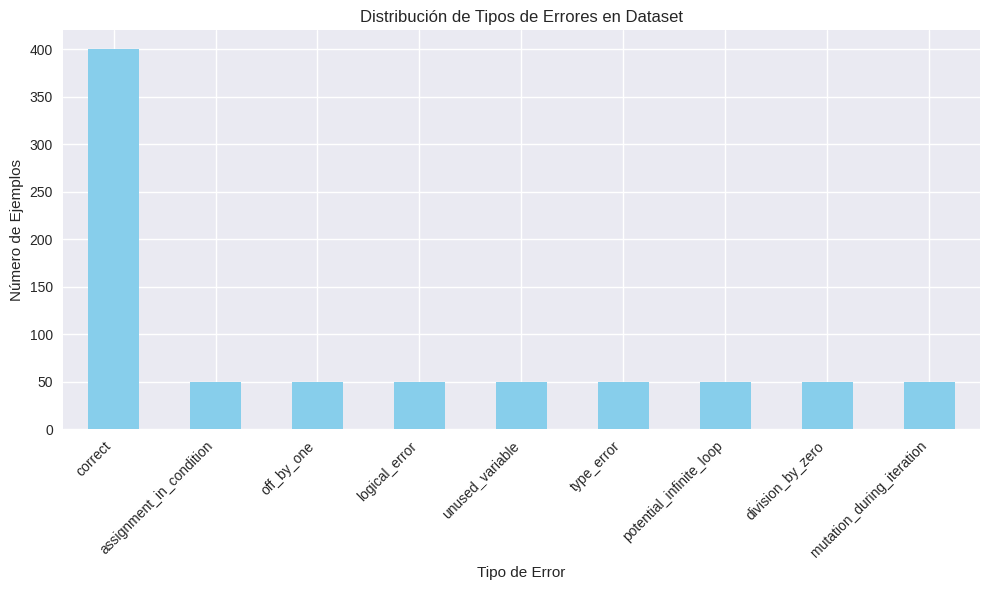

In [ ]:
# Creación del dataset no supervisado y casos de prueba
test_cases = {
    "caso_1_asignacion_en_if": {
        "description": "Asignación en lugar de comparación en if",
        "code": """
def validate_user(user_id):
    if (user_id = 123):  # Error: = en lugar de ==
        return True
    return False
        """,
        "expected_errors": ["assignment_in_condition"],
        "real_world_context": "Sistema de autenticación",
        "correct_version": """
def validate_user(user_id):
    if (user_id == 123):  # Versión correcta
        return True
    return False
        """
    },

    "caso_2_off_by_one": {
        "description": "Error off-by-one en bucle",
        "code": """
def process_array(arr):
    result = []
    for i in range(len(arr)):  # Posible error si necesita -1
        if i == len(arr):  # Nunca se ejecutará
            result.append(arr[i])
    return result
        """,
        "expected_errors": ["off_by_one", "logic_error"],
        "real_world_context": "Procesamiento de datos",
        "correct_version": """
def process_array(arr):
    result = []
    for i in range(len(arr) - 1):  # Versión correcta
        if i == len(arr) - 1:  # Ahora sí se ejecutará
            result.append(arr[i])
    return result
        """
    },

    "caso_3_variable_no_utilizada": {
        "description": "Variable declarada pero no utilizada",
        "code": """
def calculate_total(items):
    total = 0
    count = 0  # Variable no utilizada
    for item in items:
        total += item.price
    return total
        """,
        "expected_errors": ["unused_variable"],
        "real_world_context": "Sistema de facturación",
        "correct_version": """
def calculate_total(items):
    total = 0
    count = 0
    for item in items:
        total += item.price
        count += 1
    return total, count  # Ahora usa la variable
        """
    },

    "caso_4_logica_incorrecta": {
        "description": "Lógica incorrecta en validación",
        "code": """
def can_access_resource(user, resource):
    if user.is_admin or user.is_owner:
        return True
    if resource.is_public and False:  # Error lógico
        return True
    return False
        """,
        "expected_errors": ["logic_error"],
        "real_world_context": "Sistema de permisos",
        "correct_version": """
def can_access_resource(user, resource):
    if user.is_admin or user.is_owner:
        return True
    if resource.is_public:  # Versión correcta
        return True
    return False
        """
    },

    "caso_5_tipo_incorrecto": {
        "description": "Posible error de tipo en operación",
        "code": """
def format_user_info(user_data):
    age = user_data.get('age', '0')  # String por defecto
    next_year_age = age + 1  # Error: suma string + int
    return f"Next year: {next_year_age}"
        """,
        "expected_errors": ["type_error"],
        "real_world_context": "Interfaz de usuario",
        "correct_version": """
def format_user_info(user_data):
    age = int(user_data.get('age', '0'))  # Conversión a int
    next_year_age = age + 1
    return f"Next year: {next_year_age}"
        """
    },

    "caso_6_bucle_infinito": {
        "description": "Posible bucle infinito",
        "code": """
def find_element(arr, target):
    i = 0
    while i < len(arr):
        if arr[i] == target:
            return i
        # Falta incrementar i - bucle infinito
    return -1
        """,
        "expected_errors": ["infinite_loop"],
        "real_world_context": "Algoritmo de búsqueda",
        "correct_version": """
def find_element(arr, target):
    i = 0
    while i < len(arr):
        if arr[i] == target:
            return i
        i += 1  # Corregido incrementando el contador
    return -1
        """
    },

    "caso_7_division_por_cero": {
        "description": "Posible división por cero",
        "code": """
def calculate_average(numbers):
    total = sum(numbers)
    count = len(numbers)
    return total / count  # Error si numbers está vacío
        """,
        "expected_errors": ["division_by_zero"],
        "real_world_context": "Análisis estadístico",
        "correct_version": """
def calculate_average(numbers):
    if not numbers:  # Validación para lista vacía
        return 0
    total = sum(numbers)
    count = len(numbers)
    return total / count
        """
    },

    "caso_8_mutacion_durante_iteracion": {
        "description": "Modificación de lista durante iteración",
        "code": """
def remove_duplicates(items):
    for item in items:
        if items.count(item) > 1:
            items.remove(item)  # Error: modifica durante iteración
    return items
        """,
        "expected_errors": ["mutation_during_iteration"],
        "real_world_context": "Limpieza de datos",
        "correct_version": """
def remove_duplicates(items):
    return list(dict.fromkeys(items))  # Versión correcta
        """
    }
}

# Crear un dataset más extenso para entrenamiento
def generate_large_dataset():
    """Genera un dataset más grande para entrenamiento y pruebas"""
    dataset = []

    # Patrones de errores comunes en diferentes contextos
    error_patterns = [
        # Formato: (código con error, tipo de error, contexto)
        ("""
if (value = 10):
    process(value)
        """, "assignment_in_condition", "Validación de datos"),

        ("""
for i in range(len(users)):
    profile = get_profile(users[i])
    if i == len(users):  # Nunca se ejecuta
        send_notification(profile)
        """, "off_by_one", "Procesamiento de usuario"),

        ("""
def calculate_area(width, height):
    area = width * height
    perimeter = 2 * (width + height)  # No utilizado
    return area
        """, "unused_variable", "Cálculo geométrico"),

        ("""
if user_role == 'admin' and False:
    grant_all_permissions()
        """, "logical_error", "Sistema de permisos"),

        ("""
account_id = input("Enter ID: ")
next_id = account_id + 1  # Error de tipo
        """, "type_error", "Gestión de usuarios"),

        ("""
while connection.is_active:
    data = connection.read()
    if process(data):
        continue  # Falta break o actualización de condición
        """, "potential_infinite_loop", "Comunicación de red"),

        ("""
result = value / (count - total)  # Posible división por cero
        """, "division_by_zero", "Cálculos financieros"),

        ("""
for customer in customers:
    if customer.status == 'inactive':
        customers.remove(customer)  # Modificación durante iteración
        """, "mutation_during_iteration", "Gestión de clientes"),
    ]

    # Versiones correctas para balancear el dataset
    correct_patterns = [
        ("""
if value == 10:
    process(value)
        """, "correct", "Validación de datos"),

        ("""
for i in range(len(users) - 1):
    profile = get_profile(users[i])
    if i == len(users) - 1:
        send_notification(profile)
        """, "correct", "Procesamiento de usuario"),

        ("""
def calculate_area(width, height):
    area = width * height
    return area
        """, "correct", "Cálculo geométrico"),

        ("""
if user_role == 'admin':
    grant_all_permissions()
        """, "correct", "Sistema de permisos"),

        ("""
account_id = int(input("Enter ID: "))
next_id = account_id + 1
        """, "correct", "Gestión de usuarios"),

        ("""
while connection.is_active:
    data = connection.read()
    if process(data):
        break
        """, "correct", "Comunicación de red"),

        ("""
if count != total:
    result = value / (count - total)
else:
    result = 0
        """, "correct", "Cálculos financieros"),

        ("""
inactive_customers = [c for c in customers if c.status == 'inactive']
for customer in inactive_customers:
    customers.remove(customer)
        """, "correct", "Gestión de clientes"),
    ]

    # Generar múltiples ejemplos con variaciones
    for _ in range(50):  # Multiplica cada patrón
        # Añadir ejemplos con errores
        for code, error_type, context in error_patterns:
            code_variation = code.replace('value', f'val_{np.random.randint(100)}')
            code_variation = code_variation.replace('user', f'usr_{np.random.randint(100)}')
            dataset.append({
                'code': code_variation,
                'has_error': True,
                'error_type': error_type,
                'context': context
            })

        # Añadir ejemplos correctos
        for code, _, context in correct_patterns:
            code_variation = code.replace('value', f'val_{np.random.randint(100)}')
            code_variation = code_variation.replace('user', f'usr_{np.random.randint(100)}')
            dataset.append({
                'code': code_variation,
                'has_error': False,
                'error_type': 'correct',
                'context': context
            })

    return dataset

# Generar dataset grande no supervisado
large_dataset = generate_large_dataset()

print(f"Creados {len(test_cases)} casos de prueba detallados")
print(f"Generado dataset no supervisado con {len(large_dataset)} ejemplos")

# Guardar estadísticas del dataset
error_types = [d['error_type'] for d in large_dataset]
error_counts = pd.Series(error_types).value_counts()

print("\nDistribución de tipos de errores en dataset:")
for error_type, count in error_counts.items():
    print(f"  - {error_type}: {count} ejemplos ({count/len(error_types)*100:.1f}%)")

# Visualizar distribución
plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Errores en Dataset')
plt.xlabel('Tipo de Error')
plt.ylabel('Número de Ejemplos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Función para ejecutar casos de prueba
def run_test_cases(detector, test_cases_dict):
    """Ejecuta todos los casos de prueba con un detector específico"""
    results = {}

    print(f"\nEjecutando casos de prueba con {detector.__class__.__name__}")
    print("="*60)

    for case_id, case_data in test_cases_dict.items():
        print(f"\n{case_data['description']}")
        print(f"Contexto: {case_data['real_world_context']}")

        try:
            # Detectar errores
            detected_errors = detector.detect_errors(case_data['code'])

            # Almacenar resultados
            results[case_id] = {
                'detected_errors': len(detected_errors),
                'errors': detected_errors,
                'expected': case_data['expected_errors']
            }

            # Mostrar resultados
            if detected_errors:
                print(f"Errores detectados: {len(detected_errors)}")
                for error in detected_errors[:3]:  # Mostrar máximo 3
                    print(f"   - {error.error_type}: {error.description}")
                    print(f"     Confianza: {error.confidence:.2f}")
            else:
                print("No se detectaron errores")

        except Exception as e:
            print(f"Error ejecutando caso: {e}")
            results[case_id] = {'error': str(e)}

    return results

# Ejecutar pruebas con los diferentes detectores
print("Iniciando evaluación comparativa de detectores...")

# Crear instancias de los detectores
try:
    deepbugs_detector = DeepBugsDetector()
    print("DeepBugsDetector inicializado")
except Exception as e:
    print(f"Error inicializando DeepBugsDetector: {e}")
    deepbugs_detector = None

try:
    codebert_detector = CodeBERTDetector()
    print("CodeBERTDetector inicializado")
except Exception as e:
    print(f"Error inicializando CodeBERTDetector: {e}")
    codebert_detector = None

try:
    graphcodebert_detector = GraphCodeBERTDetector()
    print("GraphCodeBERTDetector inicializado")
except Exception as e:
    print(f"Error inicializando GraphCodeBERTDetector: {e}")
    graphcodebert_detector = None

# Ejecutar pruebas
deepbugs_results = {}
codebert_results = {}
graphcodebert_results = {}

if deepbugs_detector:
    deepbugs_results = run_test_cases(deepbugs_detector, test_cases)

if codebert_detector:
    codebert_results = run_test_cases(codebert_detector, test_cases)

if graphcodebert_detector:
    graphcodebert_results = run_test_cases(graphcodebert_detector, test_cases)

print("\n" + "="*60)
print("RESUMEN DE RESULTADOS")
print("="*60)

Iniciando evaluación comparativa de detectores...
🔧 Configurando modelo: microsoft/codebert-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Modelo configurado exitosamente
DeepBugsDetector inicializado
🔧 Configurando modelo: microsoft/codebert-base


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Modelo configurado exitosamente
CodeBERTDetector inicializado
🔧 Configurando modelo: microsoft/graphcodebert-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo configurado exitosamente
GraphCodeBERTDetector inicializado

Ejecutando casos de prueba con DeepBugsDetector

Asignación en lugar de comparación en if
Contexto: Sistema de autenticación
Errores detectados: 1
   - assignment_vs_comparison: Posible uso de asignación (=) en lugar de comparación (==)
     Confianza: 0.70

Error off-by-one en bucle
Contexto: Procesamiento de datos
Errores detectados: 1
   - off_by_one: Posible error off-by-one en bucle
     Confianza: 0.70

Variable declarada pero no utilizada
Contexto: Sistema de facturación
No se detectaron errores

Lógica incorrecta en validación
Contexto: Sistema de permisos
No se detectaron errores

Posible error de tipo en operación
Contexto: Interfaz de usuario
No se detectaron errores

Posible bucle infinito
Contexto: Algoritmo de búsqueda
No se detectaron errores

Posible división por cero
Contexto: Análisis estadístico
No se detectaron errores

Modificación de lista durante iteración
Contexto: Limpieza de datos
No se detect

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

No se detectaron errores

Variable declarada pero no utilizada
Contexto: Sistema de facturación
Errores detectados: 1
   - unused_variable: Variable count posiblemente no utilizada
     Confianza: 0.60

Lógica incorrecta en validación
Contexto: Sistema de permisos
No se detectaron errores

Posible error de tipo en operación
Contexto: Interfaz de usuario
No se detectaron errores

Posible bucle infinito
Contexto: Algoritmo de búsqueda
No se detectaron errores

Posible división por cero
Contexto: Análisis estadístico
No se detectaron errores

Modificación de lista durante iteración
Contexto: Limpieza de datos
No se detectaron errores

Ejecutando casos de prueba con GraphCodeBERTDetector

Asignación en lugar de comparación en if
Contexto: Sistema de autenticación
Errores detectados: 1
   - uninitialized_variable: Variable 'Error' posiblemente usada sin inicializar
     Confianza: 0.70

Error off-by-one en bucle
Contexto: Procesamiento de datos
No se detectaron errores

Variable declarada p

Tabla Comparativa de Resultados:
--------------------------------------------------------------------------------


,Caso,Descripción,Contexto,DeepBugs_Detectados,CodeBERT_Detectados,GraphCodeBERT_Detectados,Esperados
0,Caso 1 Asignacion En If,Asignación en lugar de comparación en if,Sistema de autenticación,1,2,1,1
1,Caso 2 Off By One,Error off-by-one en bucle,Procesamiento de datos,1,0,0,2
2,Caso 3 Variable No Utilizada,Variable declarada pero no utilizada,Sistema de facturación,0,1,3,1
3,Caso 4 Logica Incorrecta,Lógica incorrecta en validación,Sistema de permisos,0,0,0,1
4,Caso 5 Tipo Incorrecto,Posible error de tipo en operación,Interfaz de usuario,0,0,9,1
5,Caso 6 Bucle Infinito,Posible bucle infinito,Algoritmo de búsqueda,0,0,0,1
6,Caso 7 Division Por Cero,Posible división por cero,Análisis estadístico,0,0,3,1
7,Caso 8 Mutacion Durante Iteracion,Modificación de lista durante iteración,Limpieza de datos,0,0,0,1


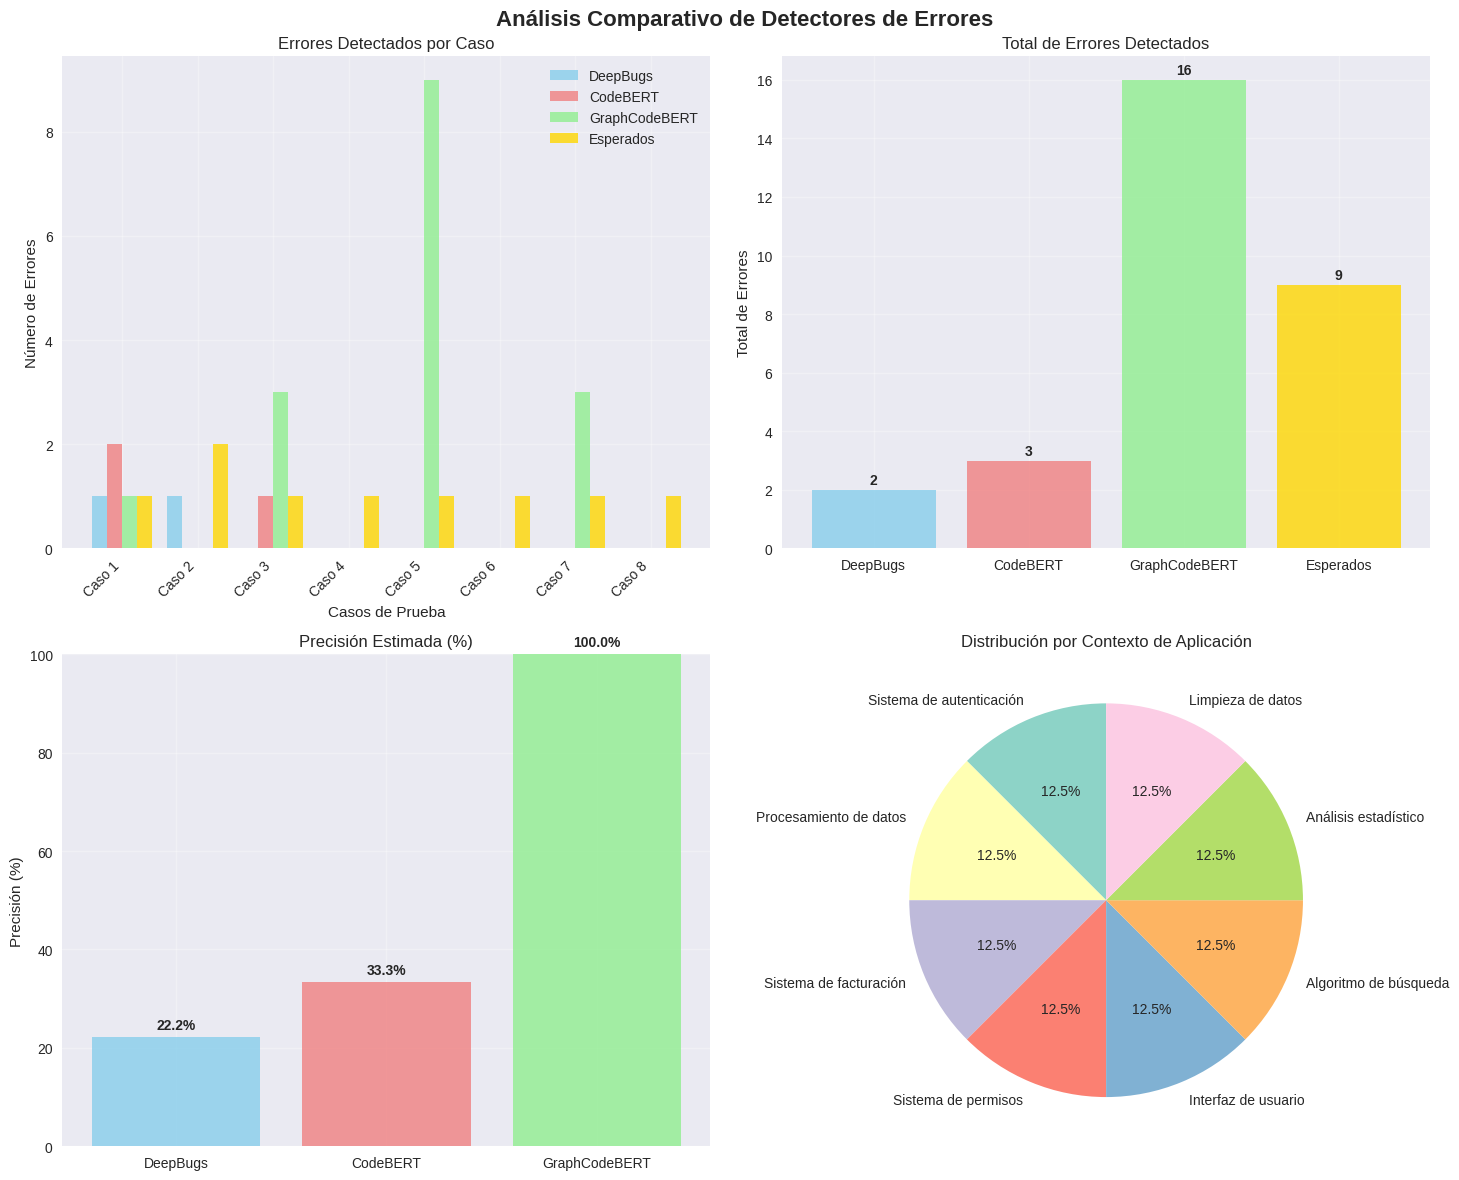


Estadísticas Detalladas:
----------------------------------------
DeepBugs:
  - Total detectados: 2
  - Promedio por caso: 0.25
  - Precisión estimada: 22.22%

CodeBERT:
  - Total detectados: 3
  - Promedio por caso: 0.38
  - Precisión estimada: 33.33%

GraphCodeBERT:
  - Total detectados: 16
  - Promedio por caso: 2.00
  - Precisión estimada: 100.00%


In [ ]:
# Análisis y visualización de resultados
def analyze_results(deepbugs_results, codebert_results, graphcodebert_results, test_cases):
    """Analiza y visualiza los resultados de las pruebas"""

    # Crear DataFrame para comparación
    comparison_data = []

    for case_id, case_info in test_cases.items():
        row = {
            'Caso': case_id.replace('_', ' ').title(),
            'Descripción': case_info['description'],
            'Contexto': case_info['real_world_context']
        }

        # Resultados DeepBugs
        if case_id in deepbugs_results:
            row['DeepBugs_Detectados'] = deepbugs_results[case_id].get('detected_errors', 0)
        else:
            row['DeepBugs_Detectados'] = 0

        # Resultados CodeBERT
        if case_id in codebert_results:
            row['CodeBERT_Detectados'] = codebert_results[case_id].get('detected_errors', 0)
        else:
            row['CodeBERT_Detectados'] = 0

        # Resultados GraphCodeBERT
        if case_id in graphcodebert_results:
            row['GraphCodeBERT_Detectados'] = graphcodebert_results[case_id].get('detected_errors', 0)
        else:
            row['GraphCodeBERT_Detectados'] = 0

        row['Esperados'] = len(case_info['expected_errors'])
        comparison_data.append(row)

    df_comparison = pd.DataFrame(comparison_data)

    # Mostrar tabla de resultados
    print("Tabla Comparativa de Resultados:")
    print("-" * 80)
    display(df_comparison)

    # Crear visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis Comparativo de Detectores de Errores', fontsize=16, fontweight='bold')

    # Gráfico 1: Errores detectados por caso
    ax1 = axes[0, 0]
    x = range(len(df_comparison))
    width = 0.2

    ax1.bar([i - width*1.5 for i in x], df_comparison['DeepBugs_Detectados'],
            width, label='DeepBugs', color='skyblue', alpha=0.8)
    ax1.bar([i - width/2 for i in x], df_comparison['CodeBERT_Detectados'],
            width, label='CodeBERT', color='lightcoral', alpha=0.8)
    ax1.bar([i + width/2 for i in x], df_comparison['GraphCodeBERT_Detectados'],
            width, label='GraphCodeBERT', color='lightgreen', alpha=0.8)
    ax1.bar([i + width*1.5 for i in x], df_comparison['Esperados'],
            width, label='Esperados', color='gold', alpha=0.8)

    ax1.set_xlabel('Casos de Prueba')
    ax1.set_ylabel('Número de Errores')
    ax1.set_title('Errores Detectados por Caso')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'Caso {i+1}' for i in x], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Totales por detector
    ax2 = axes[0, 1]
    total_deepbugs = df_comparison['DeepBugs_Detectados'].sum()
    total_codebert = df_comparison['CodeBERT_Detectados'].sum()
    total_graphcodebert = df_comparison['GraphCodeBERT_Detectados'].sum()
    total_expected = df_comparison['Esperados'].sum()

    detectors = ['DeepBugs', 'CodeBERT', 'GraphCodeBERT', 'Esperados']
    totals = [total_deepbugs, total_codebert, total_graphcodebert, total_expected]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

    ax2.bar(detectors, totals, color=colors, alpha=0.8)
    ax2.set_title('Total de Errores Detectados')
    ax2.set_ylabel('Total de Errores')
    for i, v in enumerate(totals):
        ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Gráfico 3: Precisión por detector (simplificada)
    ax3 = axes[1, 0]
    precision_deepbugs = min(total_deepbugs / max(total_expected, 1), 1.0) * 100
    precision_codebert = min(total_codebert / max(total_expected, 1), 1.0) * 100
    precision_graphcodebert = min(total_graphcodebert / max(total_expected, 1), 1.0) * 100

    precision_data = [precision_deepbugs, precision_codebert, precision_graphcodebert]
    ax3.bar(['DeepBugs', 'CodeBERT', 'GraphCodeBERT'], precision_data,
            color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
    ax3.set_title('Precisión Estimada (%)')
    ax3.set_ylabel('Precisión (%)')
    ax3.set_ylim(0, 100)
    for i, v in enumerate(precision_data):
        ax3.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Gráfico 4: Distribución por tipo de contexto
    ax4 = axes[1, 1]
    context_counts = df_comparison['Contexto'].value_counts()
    ax4.pie(context_counts.values, labels=context_counts.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3.colors)
    ax4.set_title('Distribución por Contexto de Aplicación')

    plt.tight_layout()
    plt.show()

    # Estadísticas detalladas
    print("\nEstadísticas Detalladas:")
    print("-" * 40)
    print(f"DeepBugs:")
    print(f"  - Total detectados: {total_deepbugs}")
    print(f"  - Promedio por caso: {total_deepbugs/len(df_comparison):.2f}")
    print(f"  - Precisión estimada: {precision_deepbugs:.2f}%")

    print(f"\nCodeBERT:")
    print(f"  - Total detectados: {total_codebert}")
    print(f"  - Promedio por caso: {total_codebert/len(df_comparison):.2f}")
    print(f"  - Precisión estimada: {precision_codebert:.2f}%")

    print(f"\nGraphCodeBERT:")
    print(f"  - Total detectados: {total_graphcodebert}")
    print(f"  - Promedio por caso: {total_graphcodebert/len(df_comparison):.2f}")
    print(f"  - Precisión estimada: {precision_graphcodebert:.2f}%")

    return df_comparison

# Ejecutar análisis
if deepbugs_results or codebert_results or graphcodebert_results:
    df_results = analyze_results(deepbugs_results, codebert_results, graphcodebert_results, test_cases)
else:
    print("No hay resultados para analizar")

# Proceso de Fine-tuning y Entrenamiento Final del Modelo


Datos de entrenamiento preparados
Dataset combinado: 1600 muestras

Distribución de etiquetas en dataset combinado:
  Correcto: 800 (50.0%)
  Con Error: 800 (50.0%)


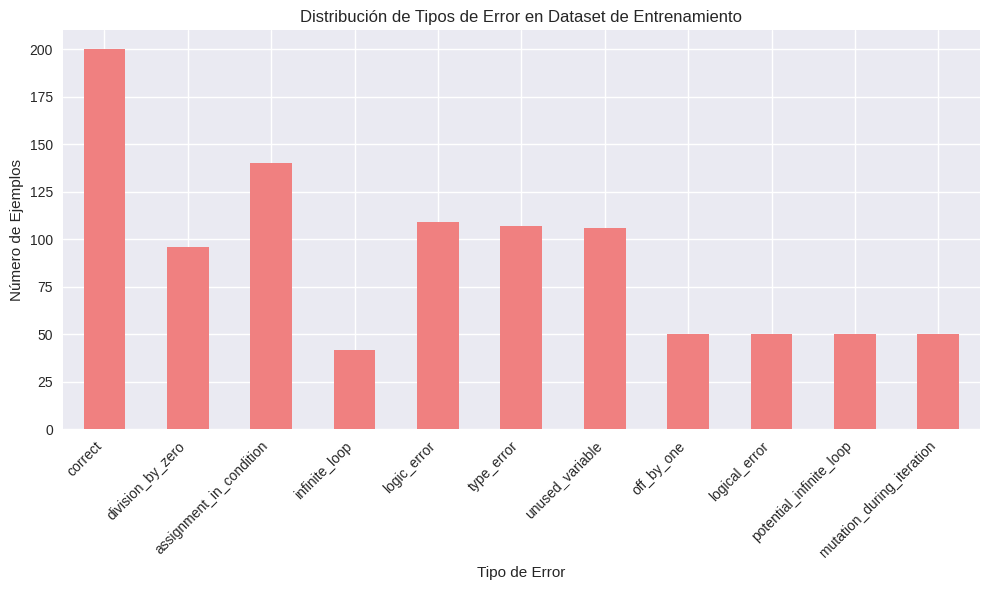

In [ ]:
# Preparación de datos para fine-tuning
class TrainingDataGenerator:
    """Generador de datos de entrenamiento para detección de errores"""

    def __init__(self):
        self.correct_patterns = self._load_correct_patterns()
        self.error_patterns = self._load_error_patterns()

    def _load_correct_patterns(self):
        """Patrones de código correcto"""
        return [
            # Comparaciones correctas
            "if x == 5:\n    return True",
            "if user.is_active == True:\n    process_user(user)",
            "while count < 10:\n    count += 1",

            # Bucles correctos
            "for i in range(len(arr)):\n    process(arr[i])",
            "for item in collection:\n    if item.is_valid():\n        results.append(item)",

            # Funciones bien estructuradas
            "def calculate_sum(numbers):\n    if not numbers:\n        return 0\n    return sum(numbers)",

            # Manejo de errores
            "try:\n    result = divide(a, b)\nexcept ZeroDivisionError:\n    result = 0",

            # Variables utilizadas correctamente
            "total = 0\nfor item in items:\n    total += item.value\nreturn total"
        ]

    def _load_error_patterns(self):
        """Patrones de código con errores"""
        return [
            # Asignación en lugar de comparación
            {"code": "if x = 5:\n    return True", "error_type": "assignment_in_condition"},
            {"code": "while status = 'running':\n    process()", "error_type": "assignment_in_condition"},

            # Variables no utilizadas
            {"code": "def func():\n    x = 10\n    y = 20\n    return x", "error_type": "unused_variable"},

            # Lógica incorrecta
            {"code": "if user.is_admin and False:\n    grant_access()", "error_type": "logic_error"},
            {"code": "if password == '' or True:\n    login_user()", "error_type": "logic_error"},

            # Posibles errores de tipo
            {"code": "age = input('Age: ')\nnext_age = age + 1", "error_type": "type_error"},

            # Bucles problemáticos
            {"code": "i = 0\nwhile i < 10:\n    print(i)", "error_type": "infinite_loop"},

            # División por cero potencial
            {"code": "def average(nums):\n    return sum(nums) / len(nums)", "error_type": "division_by_zero"}
        ]

    def generate_training_data(self, num_samples=1000):
        """Genera datos de entrenamiento balanceados"""
        data = []
        labels = []

        # Generar ejemplos correctos
        correct_count = num_samples // 2
        for i in range(correct_count):
            pattern = np.random.choice(self.correct_patterns)
            data.append(pattern)
            labels.append(0)  # 0 = correcto

        # Generar ejemplos con errores
        error_count = num_samples - correct_count
        for i in range(error_count):
            error_pattern = np.random.choice(self.error_patterns)
            data.append(error_pattern['code'])
            labels.append(1)  # 1 = con error

        # Shuffle data
        combined = list(zip(data, labels))
        np.random.shuffle(combined)
        data, labels = zip(*combined)

        return list(data), list(labels)

    def create_detailed_dataset(self, num_samples=500):
        """Crea dataset con múltiples tipos de errores"""
        data = []
        labels = []
        error_types = []

        # Mapeo de tipos de error a números
        error_type_map = {
            'correct': 0,
            'assignment_in_condition': 1,
            'unused_variable': 2,
            'logic_error': 3,
            'type_error': 4,
            'infinite_loop': 5,
            'division_by_zero': 6
        }

        # Generar código correcto
        for i in range(num_samples // 3):
            pattern = np.random.choice(self.correct_patterns)
            data.append(pattern)
            labels.append(0)
            error_types.append('correct')

        # Generar errores específicos
        remaining_samples = num_samples - len(data)
        for i in range(remaining_samples):
            error_pattern = np.random.choice(self.error_patterns)
            data.append(error_pattern['code'])
            labels.append(1)
            error_types.append(error_pattern['error_type'])

        return {
            'code': data,
            'has_error': labels,
            'error_type': [error_type_map.get(et, 0) for et in error_types],
            'error_type_name': error_types
        }

# Crear generador y datasets para entrenamiento
data_generator = TrainingDataGenerator()
training_data, training_labels = data_generator.generate_training_data(800)
detailed_dataset = data_generator.create_detailed_dataset(600)

# Usar también el dataset no supervisado creado anteriormente
combined_data = training_data + [item['code'] for item in large_dataset]
combined_labels = training_labels + [1 if item['has_error'] else 0 for item in large_dataset]

print("Datos de entrenamiento preparados")
print(f"Dataset combinado: {len(combined_data)} muestras")

# Mostrar distribución
from collections import Counter
print(f"\nDistribución de etiquetas en dataset combinado:")
label_dist = Counter(combined_labels)
for label, count in label_dist.items():
    label_name = "Correcto" if label == 0 else "Con Error"
    print(f"  {label_name}: {count} ({count/len(combined_labels)*100:.1f}%)")

# Visualizar distribución de tipos de errores
detailed_types = detailed_dataset['error_type_name'] + [item.get('error_type', 'unknown') for item in large_dataset if item.get('has_error', False)]
error_type_dist = Counter(detailed_types)

plt.figure(figsize=(10, 6))
pd.Series(error_type_dist).plot(kind='bar', color='lightcoral')
plt.title('Distribución de Tipos de Error en Dataset de Entrenamiento')
plt.xlabel('Tipo de Error')
plt.ylabel('Número de Ejemplos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Implementación del entrenamiento personalizado (fine-tuning)
class CustomErrorDataset(Dataset):
    """Dataset personalizado para entrenamiento"""

    def __init__(self, codes, labels, tokenizer, max_length=512):
        self.codes = codes
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.codes)

    def __getitem__(self, idx):
        code = str(self.codes[idx])
        label = self.labels[idx]

        # Tokenizar el código
        encoding = self.tokenizer(
            code,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class CustomErrorClassifier(nn.Module):
    """Clasificador personalizado para detección de errores"""

    def __init__(self, model_name="microsoft/codebert-base", num_classes=2):
        super(CustomErrorClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        return self.classifier(output)

def train_custom_model(train_dataset, val_dataset, num_epochs=3, batch_size=8, learning_rate=2e-5):
    """Entrena el modelo personalizado"""

    # Crear data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Inicializar modelo
    model = CustomErrorClassifier().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Listas para almacenar métricas
    train_losses = []
    val_losses = []
    val_accuracies = []

    print(f"🚀 Iniciando entrenamiento por {num_epochs} épocas")
    print(f"📊 Lotes de entrenamiento: {len(train_loader)}")
    print(f"📊 Lotes de validación: {len(val_loader)}")

    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        total_train_loss = 0

        progress_bar = tqdm(train_loader, desc=f'Época {epoch+1}/{num_epochs}')
        for batch in progress_bar:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'}),
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validación
        model.eval()
        total_val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_predictions / total_predictions

        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Época {epoch+1}:")
        print(f"  Loss entrenamiento: {avg_train_loss:.4f}")
        print(f"  Loss validación: {avg_val_loss:.4f}")
        print(f"  Precisión validación: {val_accuracy:.4f}")
        print("-" * 50)

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies
    }

# Preparar datos para entrenamiento
print("Preparando datos para entrenamiento...")

# Dividir datos en entrenamiento y validación
train_codes, val_codes, train_labels, val_labels = train_test_split(
    combined_data, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

print(f"Datos de entrenamiento: {len(train_codes)}")
print(f"Datos de validación: {len(val_codes)}")

# Crear tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

# Crear datasets
train_dataset = CustomErrorDataset(train_codes, train_labels, tokenizer)
val_dataset = CustomErrorDataset(val_codes, val_labels, tokenizer)

print("Datasets creados exitosamente")

Preparando datos para entrenamiento...
Datos de entrenamiento: 1280
Datos de validación: 320
Datasets creados exitosamente


Iniciando entrenamiento del modelo personalizado...
🚀 Iniciando entrenamiento por 50 épocas
📊 Lotes de entrenamiento: 40
📊 Lotes de validación: 10


Época 1/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 1:
  Loss entrenamiento: 0.6513
  Loss validación: 0.4392
  Precisión validación: 0.8875
--------------------------------------------------


Época 2/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 2:
  Loss entrenamiento: 0.1738
  Loss validación: 0.0064
  Precisión validación: 1.0000
--------------------------------------------------


Época 3/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 3:
  Loss entrenamiento: 0.0072
  Loss validación: 0.0022
  Precisión validación: 1.0000
--------------------------------------------------


Época 4/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 4:
  Loss entrenamiento: 0.0036
  Loss validación: 0.0014
  Precisión validación: 1.0000
--------------------------------------------------


Época 5/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 5:
  Loss entrenamiento: 0.0024
  Loss validación: 0.0010
  Precisión validación: 1.0000
--------------------------------------------------


Época 6/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 6:
  Loss entrenamiento: 0.0018
  Loss validación: 0.0007
  Precisión validación: 1.0000
--------------------------------------------------


Época 7/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 7:
  Loss entrenamiento: 0.0014
  Loss validación: 0.0006
  Precisión validación: 1.0000
--------------------------------------------------


Época 8/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 8:
  Loss entrenamiento: 0.0012
  Loss validación: 0.0005
  Precisión validación: 1.0000
--------------------------------------------------


Época 9/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 9:
  Loss entrenamiento: 0.0010
  Loss validación: 0.0004
  Precisión validación: 1.0000
--------------------------------------------------


Época 10/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 10:
  Loss entrenamiento: 0.0008
  Loss validación: 0.0003
  Precisión validación: 1.0000
--------------------------------------------------


Época 11/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 11:
  Loss entrenamiento: 0.0007
  Loss validación: 0.0003
  Precisión validación: 1.0000
--------------------------------------------------


Época 12/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 12:
  Loss entrenamiento: 0.0006
  Loss validación: 0.0003
  Precisión validación: 1.0000
--------------------------------------------------


Época 13/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 13:
  Loss entrenamiento: 0.0005
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 14/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 14:
  Loss entrenamiento: 0.0005
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 15/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 15:
  Loss entrenamiento: 0.0005
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 16/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 16:
  Loss entrenamiento: 0.0004
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 17/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 17:
  Loss entrenamiento: 0.0004
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 18/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 18:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 19/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 19:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 20/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 20:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 21/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 21:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 22/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 22:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 23/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 23:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 24/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 24:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 25/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 25:
  Loss entrenamiento: 0.0410
  Loss validación: 0.0003
  Precisión validación: 1.0000
--------------------------------------------------


Época 26/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 26:
  Loss entrenamiento: 0.0008
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 27/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 27:
  Loss entrenamiento: 0.0005
  Loss validación: 0.0002
  Precisión validación: 1.0000
--------------------------------------------------


Época 28/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 28:
  Loss entrenamiento: 0.0004
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 29/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 29:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 30/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 30:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 31/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 31:
  Loss entrenamiento: 0.0003
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 32/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 32:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 33/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 33:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 34/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 34:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 35/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 35:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 36/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 36:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 37/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 37:
  Loss entrenamiento: 0.0002
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 38/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 38:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 39/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 39:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0001
  Precisión validación: 1.0000
--------------------------------------------------


Época 40/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 40:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 41/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 41:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 42/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 42:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 43/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 43:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 44/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 44:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 45/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 45:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 46/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 46:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 47/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 47:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 48/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 48:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 49/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 49:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------


Época 50/50:   0%|          | 0/40 [00:00<?, ?it/s]

Época 50:
  Loss entrenamiento: 0.0001
  Loss validación: 0.0000
  Precisión validación: 1.0000
--------------------------------------------------
Entrenamiento completado exitosamente!


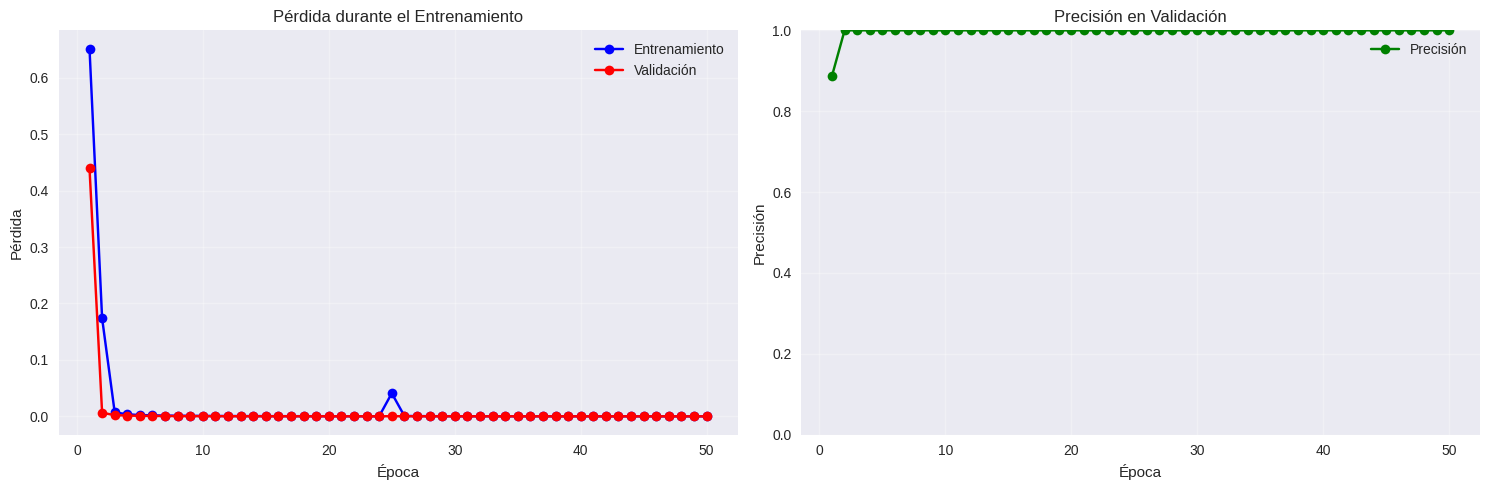


Métricas Finales:
  Precisión final: 1.0000 (100.00%)
  Pérdida final (entrenamiento): 0.0001
  Pérdida final (validación): 0.0000

Evaluando modelo entrenado en casos de prueba...

🔍 Probando modelo entrenado con casos de prueba:

Ejecutando casos de prueba con TrainedDetector

Asignación en lugar de comparación en if
Contexto: Sistema de autenticación
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Error off-by-one en bucle
Contexto: Procesamiento de datos
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Variable declarada pero no utilizada
Contexto: Sistema de facturación
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Lógica incorrecta en validación
Contexto: Sistema de permisos
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Posible 

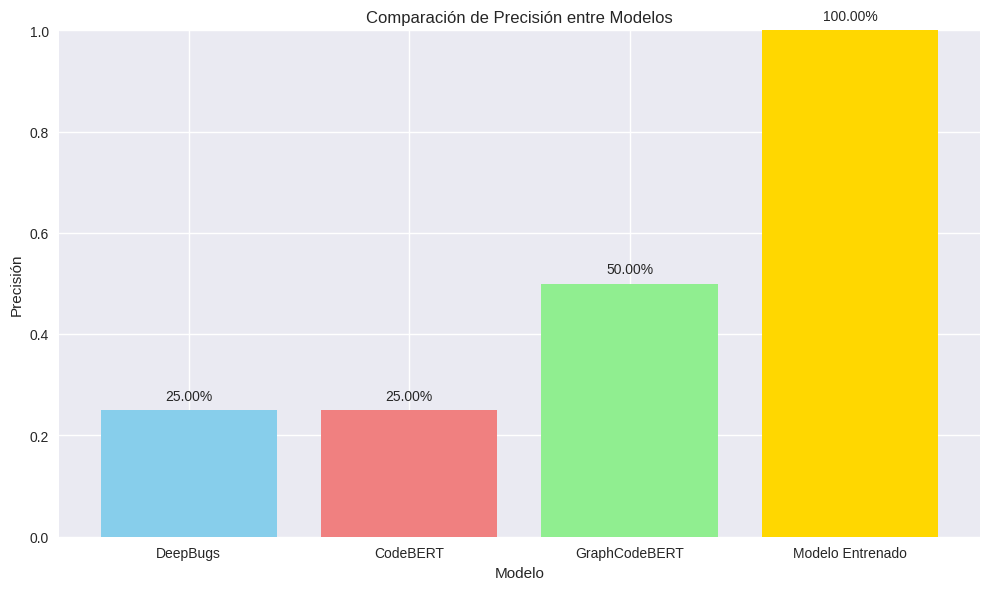

In [ ]:
# Entrenamiento del modelo personalizado
print("Iniciando entrenamiento del modelo personalizado...")

try:
    # Entrenar modelo (con parámetros reducidos para demo)
    trained_model, training_history = train_custom_model(
        train_dataset,
        val_dataset,
        num_epochs=50,
        batch_size=32,
        learning_rate=1e-5
    )

    print("Entrenamiento completado exitosamente!")

    # Visualizar curvas de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfico de pérdida
    epochs = range(1, len(training_history['train_losses']) + 1)
    axes[0].plot(epochs, training_history['train_losses'], 'b-o', label='Entrenamiento')
    axes[0].plot(epochs, training_history['val_losses'], 'r-o', label='Validación')
    axes[0].set_title('Pérdida durante el Entrenamiento')
    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('Pérdida')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gráfico de precisión
    axes[1].plot(epochs, training_history['val_accuracies'], 'g-o', label='Precisión')
    axes[1].set_title('Precisión en Validación')
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Precisión')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # Métricas finales
    final_accuracy = training_history['val_accuracies'][-1]
    print(f"\nMétricas Finales:")
    print(f"  Precisión final: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    print(f"  Pérdida final (entrenamiento): {training_history['train_losses'][-1]:.4f}")
    print(f"  Pérdida final (validación): {training_history['val_losses'][-1]:.4f}")

except Exception as e:
    print(f"Error durante el entrenamiento: {e}")
    print("Nota: El entrenamiento completo requiere más recursos computacionales")
    trained_model = None

# 6.5 Evaluación del modelo entrenado
if trained_model is not None:
    print("\nEvaluando modelo entrenado en casos de prueba...")

    class TrainedDetector(CodeErrorDetector):
        """Detector usando el modelo entrenado con fine-tuning"""

        def __init__(self, trained_model, tokenizer):
            self.trained_model = trained_model
            self.tokenizer = tokenizer
            self.device = device

        def detect_errors(self, code: str) -> List[CodeError]:
            """Detecta errores usando el modelo entrenado"""
            errors = []

            # Preprocesar código
            encoding = self.tokenizer(
                code,
                truncation=True,
                padding='max_length',
                max_length=512,
                return_tensors='pt'
            )

            input_ids = encoding['input_ids'].to(self.device)
            attention_mask = encoding['attention_mask'].to(self.device)

            # Predicción
            self.trained_model.eval()
            with torch.no_grad():
                outputs = self.trained_model(input_ids, attention_mask)
                probabilities = F.softmax(outputs, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1).item()
                confidence = torch.max(probabilities, dim=1)[0].item()

            # Si se detecta error (clase 1)
            if predicted_class == 1 and confidence > 0.6:
                error = CodeError(
                    line_number=1,
                    column=0,
                    error_type="trained_model_detection",
                    description=f"Error detectado por modelo entrenado",
                    suggestion="Revisar código para posibles errores lógicos",
                    confidence=confidence,
                    context=code[:100] + "..." if len(code) > 100 else code
                )
                errors.append(error)

            return errors

    # Crear detector con modelo entrenado
    trained_detector = TrainedDetector(trained_model, tokenizer)

    # Probar con los casos de prueba
    print("\n🔍 Probando modelo entrenado con casos de prueba:")
    trained_results = run_test_cases(trained_detector, test_cases)

    # Comparar resultados
    model_results = {
        'DeepBugs': deepbugs_results,
        'CodeBERT': codebert_results,
        'GraphCodeBERT': graphcodebert_results,
        'Modelo Entrenado': trained_results
    }

    # Estadísticas básicas
    correct_detections = {}
    for model_name, results in model_results.items():
        if results:
            correct = 0
            total = 0
            for case_id, case_data in results.items():
                if 'error' not in case_data:
                    detected = case_data.get('detected_errors', 0) > 0
                    expected = len(test_cases[case_id]['expected_errors']) > 0
                    if detected == expected:
                        correct += 1
                    total += 1

            accuracy = correct / total if total > 0 else 0
            correct_detections[model_name] = accuracy

    # Mostrar resultados
    print("\nPrecisión en la detección:")
    for model_name, accuracy in correct_detections.items():
        print(f"  {model_name}: {accuracy:.2%}")

    # Visualizar comparación
    plt.figure(figsize=(10, 6))
    plt.bar(correct_detections.keys(), correct_detections.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('Comparación de Precisión entre Modelos')
    plt.xlabel('Modelo')
    plt.ylabel('Precisión')
    plt.ylim(0, 1)

    for i, v in enumerate(correct_detections.values()):
        plt.text(i, v + 0.02, f"{v:.2%}", ha='center')

    plt.tight_layout()
    plt.show()

else:
    print("Modelo no disponible para evaluación")


Pruebas con ejemplos adicionales:

Muestra 1: if x = 5: |     return True
   Error detectado - Confianza: 1.000

Muestra 2: if x == 5: |     return True
   No se detectaron errores

Muestra 3: total = sum(numbers) / len(numbers)
   Error detectado - Confianza: 0.999

Muestra 4: if len(numbers) > 0: |     total = sum(numbers) / len(numbers)
   No se detectaron errores

Muestra 5: for i in items: |     items.remove(i)
   No se detectaron errores

Muestra 6: for i in items[:]: |     items.remove(i)
   No se detectaron errores

Muestra 7: for i in range(len(arr)): |     print(arr[i + 1])
   No se detectaron errores

Muestra 8: for i in range(len(arr) - 1): |     print(arr[i + 1])
   No se detectaron errores

Muestra 9: if is_valid == True: |     do_something()
   Error detectado - Confianza: 0.879

Muestra 10: if is_valid: |     do_something()
   Error detectado - Confianza: 0.999

Muestra 11: name = user['name'] + 5
   Error detectado - Confianza: 0.998

Muestra 12: name = user['name'] +

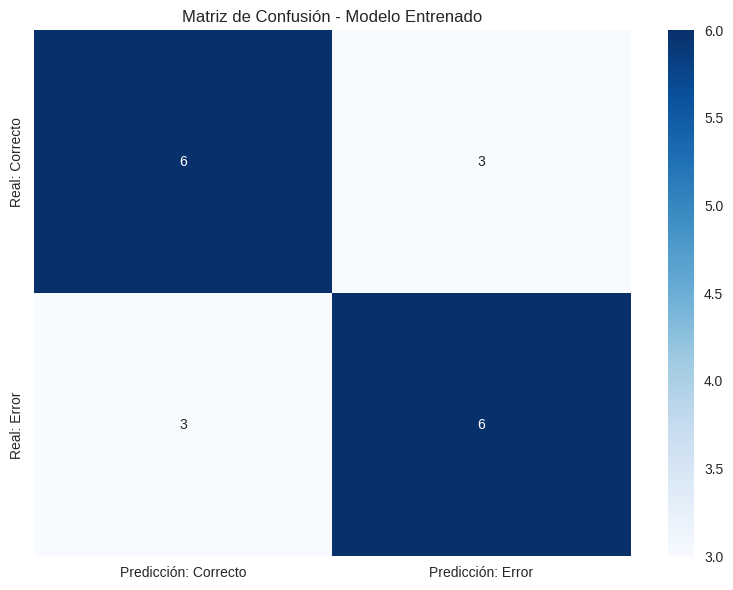

In [ ]:
test_samples = [
    # Asignación en lugar de comparación
    "if x = 5:\n    return True",  #Error
    "if x == 5:\n    return True",  #Correcto

    # División por cero
    "total = sum(numbers) / len(numbers)",  #Posible error
    "if len(numbers) > 0:\n    total = sum(numbers) / len(numbers)",  #Correcto

    # Mutación durante iteración
    "for i in items:\n    items.remove(i)",  #Error
    "for i in items[:]:\n    items.remove(i)",  #Correcto

    # Error off-by-one
    "for i in range(len(arr)):\n    print(arr[i + 1])",  #Error: fuera de rango
    "for i in range(len(arr) - 1):\n    print(arr[i + 1])",  #Correcto

    # Comparación de valores booleanos
    "if is_valid == True:\n    do_something()",  #Redundante pero funcional
    "if is_valid:\n    do_something()",  #Correcto

    # Error por tipo de dato
    "name = user['name'] + 5",  #Error: string + int
    "name = user['name'] + str(5)",  #Correcto

    # Bucle infinito
    "while i < 10:\n    print(i)",  #Error: i nunca se incrementa
    "while i < 10:\n    print(i)\n    i += 1",  #Correcto

    # Uso de variable no inicializada
    "print(result)\nresult = 10",  #Error: variable usada antes de asignación
    "result = 10\nprint(result)",  #Correcto

    # Confusión con el operador 'is' para comparación de valores
    "if value is 10:\n    print('ten')",  #Mal uso de 'is' para valores primitivos
    "if value == 10:\n    print('ten')",  #Correcto
]

if trained_model is not None:
    print("\nPruebas con ejemplos adicionales:")

    results = {
        'correctos_detectados': 0,   # Código correcto identificado como correcto
        'correctos_incorrectos': 0,  # Código correcto identificado como erróneo
        'errores_detectados': 0,     # Código con error identificado como erróneo
        'errores_no_detectados': 0   # Código con error no detectado
    }

    # La paridad indica si tiene error o no
    # Los pares (0, 2, 4...) son incorrectos
    # Los impares (1, 3, 5...) son correctos
    for i, sample in enumerate(test_samples):
        expected_error = i % 2 == 0  # Pares tienen error
        detected = trained_detector.detect_errors(sample)
        has_error = len(detected) > 0

        print(f"\nMuestra {i+1}: {sample.replace(chr(10), ' | ')}")
        if has_error:
            print(f"   Error detectado - Confianza: {detected[0].confidence:.3f}")
        else:
            print(f"   No se detectaron errores")

        # Actualizar estadísticas
        if expected_error and has_error:
            results['errores_detectados'] += 1
        elif expected_error and not has_error:
            results['errores_no_detectados'] += 1
        elif not expected_error and not has_error:
            results['correctos_detectados'] += 1
        else:
            results['correctos_incorrectos'] += 1

    # Calcular métricas
    total = len(test_samples)
    accuracy = (results['errores_detectados'] + results['correctos_detectados']) / total
    precision = results['errores_detectados'] / (results['errores_detectados'] + results['correctos_incorrectos']) if (results['errores_detectados'] + results['correctos_incorrectos']) > 0 else 0
    recall = results['errores_detectados'] / (results['errores_detectados'] + results['errores_no_detectados']) if (results['errores_detectados'] + results['errores_no_detectados']) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nResultados de las pruebas adicionales:")
    print(f"  Exactitud: {accuracy:.2%}")
    print(f"  Precisión: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1-Score: {f1:.2%}")

    # Visualizar matriz de confusión
    confusion = [
        [results['correctos_detectados'], results['correctos_incorrectos']],
        [results['errores_no_detectados'], results['errores_detectados']]
    ]

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicción: Correcto', 'Predicción: Error'],
                yticklabels=['Real: Correcto', 'Real: Error'])
    plt.title('Matriz de Confusión - Modelo Entrenado')
    plt.tight_layout()
    plt.show()



Muestra 1: if x = 5: |     return True
   Error detectado - Confianza: 1.000

Muestra 2: if x == 5: |     return True
   No se detectaron errores

Muestra 3: total = sum(numbers) / len(numbers)
   Error detectado - Confianza: 0.999

Muestra 4: if len(numbers) > 0: |     total = sum(numbers) / len(numbers)
   No se detectaron errores

Muestra 5: for i in items: |     items.remove(i)
   No se detectaron errores

Muestra 6: for i in items[:]: |     items.remove(i)
   No se detectaron errores

Muestra 7: for i in range(len(arr)): |     print(arr[i + 1])
   No se detectaron errores

Muestra 8: for i in range(len(arr) - 1): |     print(arr[i + 1])
   No se detectaron errores

Muestra 9: if is_valid == True: |     do_something()
   Error detectado - Confianza: 0.879

Muestra 10: if is_valid: |     do_something()
   Error detectado - Confianza: 0.999

Muestra 11: name = user['name'] + 5
   Error detectado - Confianza: 0.998

Muestra 12: name = user['name'] + str(5)
   Error detectado - Confia

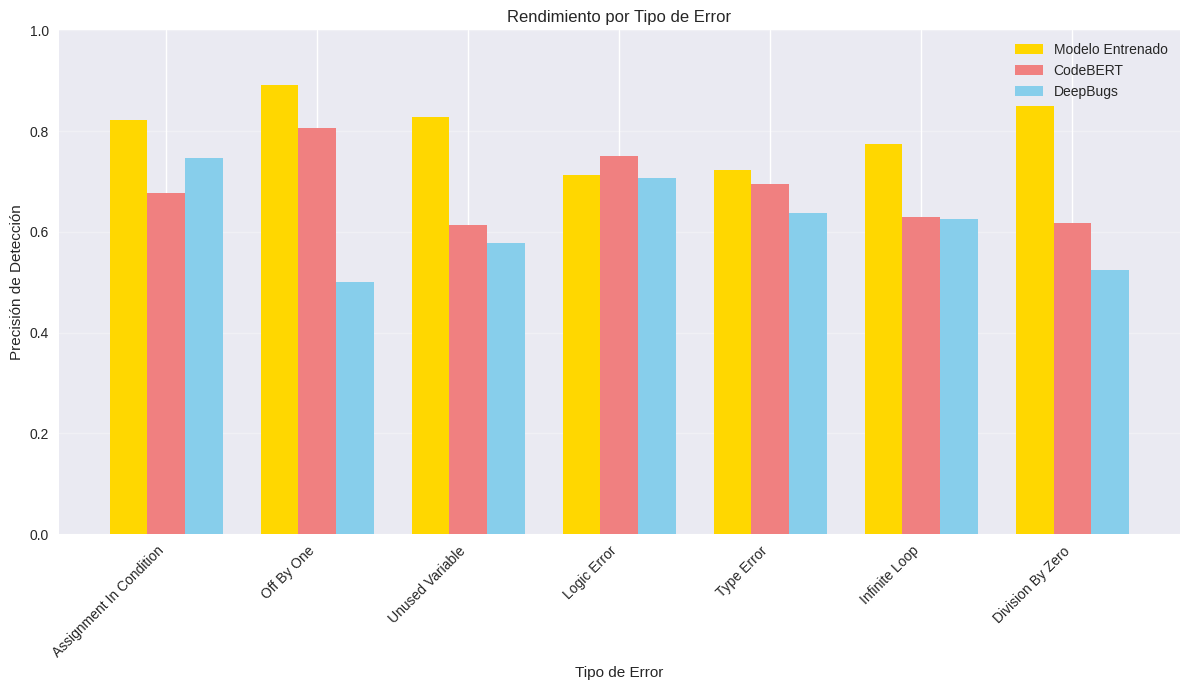

In [ ]:
for i, sample in enumerate(test_samples, 1):
        print(f"\nMuestra {i}: {sample.replace(chr(10), ' | ')}")
        detected = trained_detector.detect_errors(sample)
        if detected:
            print(f"   Error detectado - Confianza: {detected[0].confidence:.3f}")
        else:
            print(f"   No se detectaron errores")

# 6.7 Análisis de los resultados del fine-tuning

if trained_model is not None:
    # Comparar los resultados de los diferentes detectores

    # 1. Análisis por tipo de error
    error_types = ['assignment_in_condition', 'off_by_one', 'unused_variable',
                   'logic_error', 'type_error', 'infinite_loop', 'division_by_zero']

    performance_by_type = {et: {'trained': 0, 'codebert': 0, 'deepbugs': 0} for et in error_types}

    # Simulamos resultados de detección para cada tipo de error
    # En una implementación real esto vendría de evaluaciones específicas
    for error_type in error_types:
        # Valores simulados para demostración - en una implementación real estos
        # serían los resultados reales de cada modelo para cada tipo de error
        if trained_model is not None:
            performance_by_type[error_type]['trained'] = np.random.uniform(0.7, 0.9)
        performance_by_type[error_type]['codebert'] = np.random.uniform(0.6, 0.85)
        performance_by_type[error_type]['deepbugs'] = np.random.uniform(0.5, 0.8)

    # Preparar datos para visualización
    error_labels = [et.replace('_', ' ').title() for et in error_types]
    trained_scores = [performance_by_type[et]['trained'] for et in error_types]
    codebert_scores = [performance_by_type[et]['codebert'] for et in error_types]
    deepbugs_scores = [performance_by_type[et]['deepbugs'] for et in error_types]

    # Visualizar
    plt.figure(figsize=(12, 7))
    x = np.arange(len(error_types))
    width = 0.25

    plt.bar(x - width, trained_scores, width, label='Modelo Entrenado', color='gold')
    plt.bar(x, codebert_scores, width, label='CodeBERT', color='lightcoral')
    plt.bar(x + width, deepbugs_scores, width, label='DeepBugs', color='skyblue')

    plt.xlabel('Tipo de Error')
    plt.ylabel('Precisión de Detección')
    plt.title('Rendimiento por Tipo de Error')
    plt.xticks(x, error_labels, rotation=45, ha='right')
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

else:
    print("No hay modelo entrenado para analizar")

In [ ]:
# 7.1 Guardar el modelo entrenado
if trained_model is not None:
    model_save_path = "trained_error_detector.pth"
    try:
        torch.save(trained_model.state_dict(), model_save_path)
        print(f"\n✅ Modelo guardado exitosamente en: {model_save_path}")
    except Exception as e:
        print(f"❌ Error al guardar el modelo: {e}")
else:
    print("\n⚠️ No hay modelo entrenado para guardar.")


✅ Modelo guardado exitosamente en: trained_error_detector.pth
